In [1]:
#import macroparameters

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import plotly.express as px

    
import os, sys, shutil


def print_all_df(df):
    # Permanently changes the pandas settings
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', -1)
    
    # All dataframes hereafter reflect these changes.
    display(df)
    
    print('**RESET_OPTIONS**')
    
    # Resets the options
    pd.reset_option('all')
    

# Define Prefix of which experiment to analyse

In [2]:
prefix = "ALTE007"

experiment_file_path = "/app/src/OT2_scripts/" + prefix

data_path = experiment_file_path + "/processed_data_files/"

plots_path = experiment_file_path + "/plots/"

In [3]:
# navigate into tidy_data_files and make a list of all files

os.chdir(data_path)

items = os.listdir(".")

# lists all .csv
csv_list = []
for names in items:
    if names.endswith(".csv"):
        csv_list.append(names)
print(csv_list)



['ALTE007_parsed_dataset.csv', 'ALTE007_tidy_data.csv']


In [4]:
# import the correct tidy dataset

print(os.getcwd())

# make file name
dataset = prefix +'_tidy_data.csv'

# import into pandas DF
all_gain_data = pd.read_csv(dataset, header=0)

# change back to /src for neatness
os.chdir('/app')

/app/src/OT2_scripts/ALTE007/processed_data_files


In [5]:
# get the individual experiment numbers
experiment_numbers = all_gain_data['Experiment #'].unique()
experiment_numbers

array([ 9, 10])

In [6]:
# get the individual products
product_list = all_gain_data['Expression Product'].unique()
product_list

array(['GFP'], dtype=object)

# Plot all replicates for both gain settings

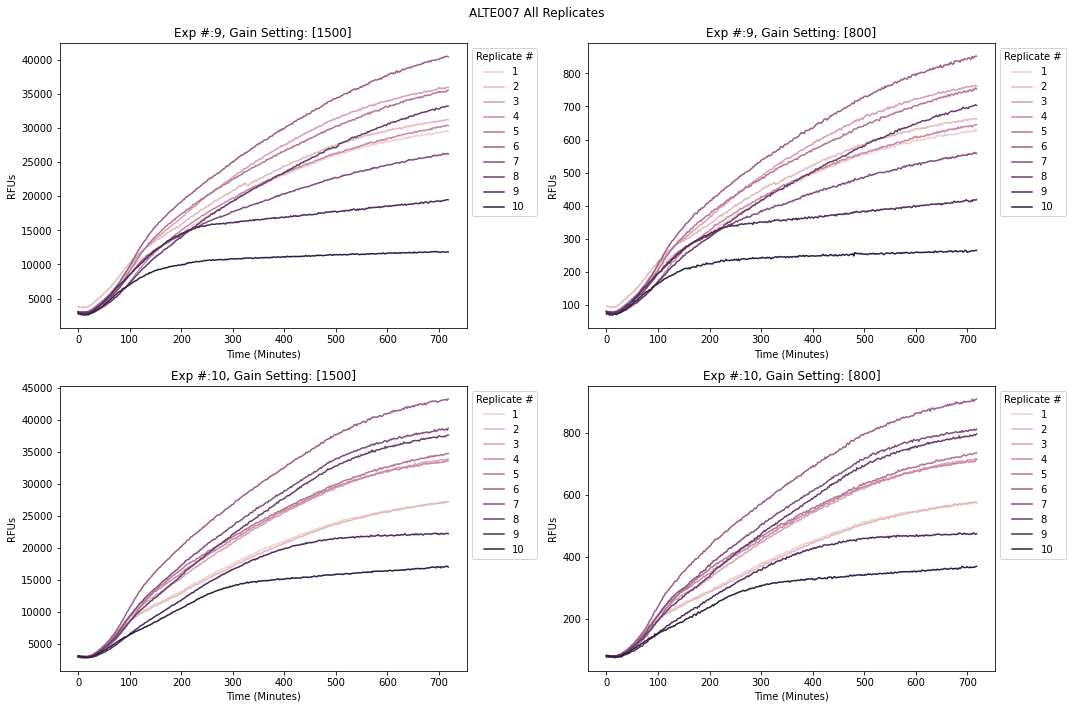

In [7]:
fig = plt.figure(figsize=(15,10))

plot_counter = 1

for i, exp_num in enumerate(experiment_numbers):
    
    #just get the individual experiment
    experiment_subsection = all_gain_data[all_gain_data['Experiment #'] == exp_num]


    for i, product in enumerate(product_list):

        #just get the individual product
        product_subsection = experiment_subsection[experiment_subsection['Expression Product'] == product]

        # get individual gain values of product subsection
        gain_list = product_subsection['Gain Setting'].unique()

        for i, gain in enumerate(gain_list):



            #just get the individual gain of the product slice

            gain_subsection = product_subsection[product_subsection['Gain Setting'] == gain]


            # get individual gain

            ax = plt.subplot(2, 2, plot_counter)

            sns.lineplot(data = gain_subsection,
                    x = 'Time (Minutes)',
                    y = 'RFUs',
                    hue = 'Replicate',
                    legend='full',
                    ax=ax)

            ax.legend(title="Replicate #", loc = 2, bbox_to_anchor = (1,1))
            ax.set(title="Exp #:" +str(exp_num) + ", Gain Setting: " + str(gain_subsection['Gain Setting'].unique()))

            plot_counter += 1


#fig.text(0.001, 0.65, 'Malachite Green', ha='center', rotation="vertical")
#fig.text(0.001, 0.25, 'GFP', ha='center', rotation="vertical")


fig.suptitle(prefix+ " All Replicates")
fig.tight_layout()




##### Save fig


path = plots_path

# make directory for sticking the output in
if os.path.isdir(path) == False:
    os.mkdir(path, mode=0o777)
    
    
#navigate to tidy_data_files
os.chdir(path)

plt.savefig(prefix+"_plate_reader_run_all_replicates.png")


#navigate home for neatness
os.chdir('/app')



plt.show()



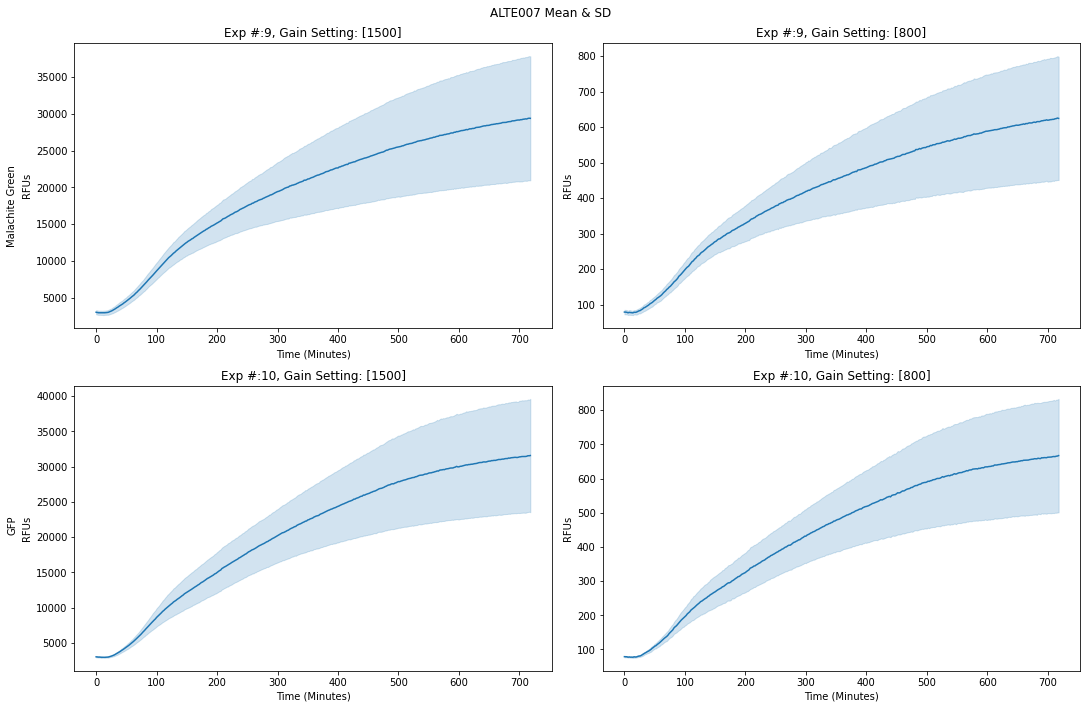

In [8]:
fig = plt.figure(figsize=(15,10))

plot_counter = 1

for i, exp_num in enumerate(experiment_numbers):
    
    #just get the individual experiment
    experiment_subsection = all_gain_data[all_gain_data['Experiment #'] == exp_num]


    for i, product in enumerate(product_list):

        #just get the individual product
        product_subsection = experiment_subsection[experiment_subsection['Expression Product'] == product]

        # get individual gain values of product subsection
        gain_list = product_subsection['Gain Setting'].unique()

        for i, gain in enumerate(gain_list):



            #just get the individual gain of the product slice

            gain_subsection = product_subsection[product_subsection['Gain Setting'] == gain]


            # get individual gain

            ax = plt.subplot(2, 2, plot_counter)

            sns.lineplot(data = gain_subsection,
                    x = 'Time (Minutes)',
                    y = 'RFUs',
                    ci = 'sd',
                    legend='full',
                    ax=ax)

            ax.set(title="Exp #:" +str(exp_num) + ", Gain Setting: " + str(gain_subsection['Gain Setting'].unique()))
            plot_counter += 1

fig.text(0.001, 0.65, 'Malachite Green', ha='center', rotation="vertical")
fig.text(0.001, 0.25, 'GFP', ha='center', rotation="vertical")

fig.suptitle(prefix+ " Mean & SD")
fig.tight_layout()



##### Save fig


path = plots_path

# make directory for sticking the output in
if os.path.isdir(path) == False:
    os.mkdir(path, mode=0o777)
    
    
#navigate to tidy_data_files
os.chdir(path)

plt.savefig(prefix+"_plate_reader_run_mean_sd.png")


#navigate home for neatness
os.chdir('/app')

plt.show()


In [9]:
GFP = all_gain_data[all_gain_data["Expression Product"] == "GFP"]
all_gain_data

timepoint = GFP[GFP["Time (Minutes)"] == 300]

timepoint = timepoint[timepoint['Gain Setting'] == 800]
timepoint

,Well,Sample ID,Time (Minutes),RFUs,Gain Setting,Chromatic Settings,Expression Product,Amplicon DNA Template,Energy Solution,Experiment #,...,wax_dispense_height,wax_dispense_volume,wax_disposal_volume,wax_new_tip,wax_touch_tip,Reaction Temperature (°C),Performed by,Instrument,Plate Reader Run #,Assay Date
10200,B03,Sample X1,300,417,800,485_520_1,GFP,s70_deGFP_MGA,AP_ES_004,9,...,-3,35,30,never,False,37,AP & MJS,BMG POLARstar Omega,6,2022-06-28
10201,B05,Sample X2,300,446,800,485_520_1,GFP,s70_deGFP_MGA,AP_ES_004,9,...,-3,35,30,never,False,37,AP & MJS,BMG POLARstar Omega,6,2022-06-28
10202,B07,Sample X3,300,488,800,485_520_1,GFP,s70_deGFP_MGA,AP_ES_004,9,...,-3,35,30,never,False,37,AP & MJS,BMG POLARstar Omega,6,2022-06-28
10203,B09,Sample X4,300,428,800,485_520_1,GFP,s70_deGFP_MGA,AP_ES_004,9,...,-3,35,30,never,False,37,AP & MJS,BMG POLARstar Omega,6,2022-06-28
10204,B11,Sample X5,300,482,800,485_520_1,GFP,s70_deGFP_MGA,AP_ES_004,9,...,-3,35,30,never,False,37,AP & MJS,BMG POLARstar Omega,6,2022-06-28
10205,B13,Sample X6,300,537,800,485_520_1,GFP,s70_deGFP_MGA,AP_ES_004,9,...,-3,35,30,never,False,37,AP & MJS,BMG POLARstar Omega,6,2022-06-28
10206,B15,Sample X7,300,385,800,485_520_1,GFP,s70_deGFP_MGA,AP_ES_004,9,...,-3,35,30,never,False,37,AP & MJS,BMG POLARstar Omega,6,2022-06-28
10207,B17,Sample X8,300,414,800,485_520_1,GFP,s70_deGFP_MGA,AP_ES_004,9,...,-3,35,30,never,False,37,AP & MJS,BMG POLARstar Omega,6,2022-06-28
10208,B19,Sample X9,300,351,800,485_520_1,GFP,s70_deGFP_MGA,AP_ES_004,9,...,-3,35,30,never,False,37,AP & MJS,BMG POLARstar Omega,6,2022-06-28
10209,B21,Sample X10,300,241,800,485_520_1,GFP,s70_deGFP_MGA,AP_ES_004,9,...,-3,35,30,never,False,37,AP & MJS,BMG POLARstar Omega,6,2022-06-28


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

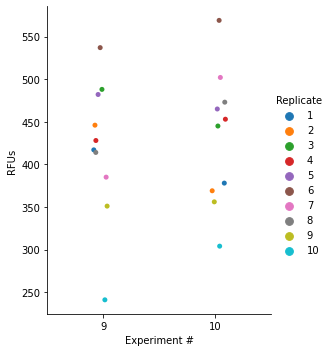

In [10]:
fig = plt.figure(figsize=(10,5))

ax1 = sns.catplot(
            data = timepoint,
            x = "Experiment #",
            y = "RFUs",
            hue="Replicate",
            ax=ax,
            height=5,
            aspect=.8)

ax1 = sns.boxplot(
            data=timepoint,
            x="Experiment #",
            y="RFUs",
            ax=ax,
            whis=np.inf)


fig.suptitle("Plate_reader_run_"+prefix+ " Scatter Plot")
fig.tight_layout()


##### Save fig


path = plots_path

# make directory for sticking the output in
if os.path.isdir(path) == False:
    os.mkdir(path, mode=0o777)
    
    
#navigate to tidy_data_files
os.chdir(path)

plt.savefig(prefix+"_plate_reader_run_vertical_scatter_plot.png")


#navigate home for neatness
os.chdir('/app')

plt.show()


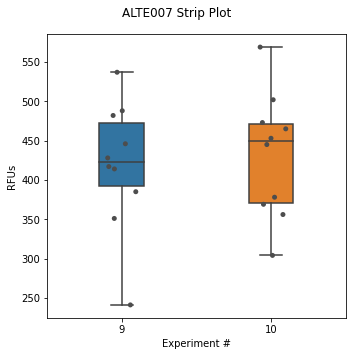

In [11]:
fig = plt.figure(figsize=(5,5))

ax = sns.boxplot(x="Experiment #", y="RFUs", data=timepoint, whis=np.inf, width=0.3)
ax = sns.stripplot(x="Experiment #", y="RFUs", data=timepoint, color=".3")

fig.suptitle(prefix+ " Strip Plot")
fig.tight_layout()


##### Save fig


path = plots_path

# make directory for sticking the output in
if os.path.isdir(path) == False:
    os.mkdir(path, mode=0o777)
    
    
#navigate to tidy_data_files
os.chdir(path)

plt.savefig(prefix+"_plate_reader_run_box_strip_plot.png.png")


#navigate home for neatness
os.chdir('/app')

plt.show()